# Avocado Dataset Using KNN & Linear Regression Model
##### By the end of this mini project, you are supposed to deliver within your code:
##### Multiple R-squared measures resembling different k-neighbors used for training your KNN regression.
##### The R-squared measure resembling one additional regression modeling technique such as Linear Regression.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [20]:
df = pd.read_csv('avocado.csv')
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [22]:
df.shape

(18249, 14)

In [23]:
#Checking for null values 
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [24]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [25]:
#Dropping columns that are correlated to avoid multicolinearity
df = df.drop(columns=['Date', 'region', 'Unnamed: 0'], axis=1)

In [26]:
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015


### Visualize Data to get more insight

Text(0.5, 1.0, 'Total Bags vs Average Price')

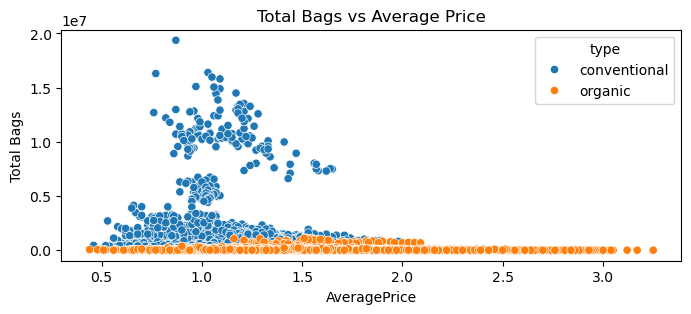

In [27]:
plt.figure(figsize=(8,3))
sn.scatterplot(data = df, x=df["AveragePrice"], y=df["Total Bags"], hue=df["type"])
plt.title("Total Bags vs Average Price")

In [28]:
print(df['type'].unique())  #displays unieque job categories column
print(df['type'].value_counts())

['conventional' 'organic']
type
conventional    9126
organic         9123
Name: count, dtype: int64


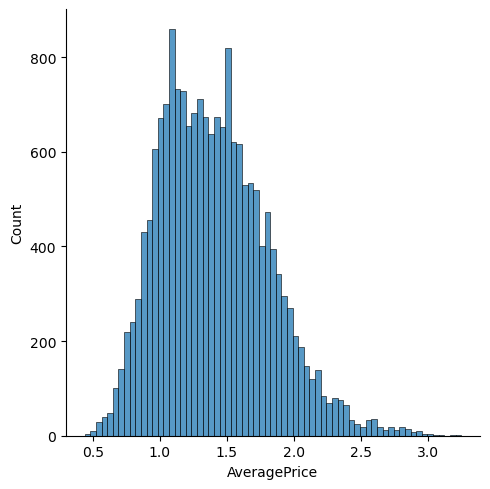

In [29]:
#Plot a distribution plot of AveragePrice
sn.displot(df["AveragePrice"])

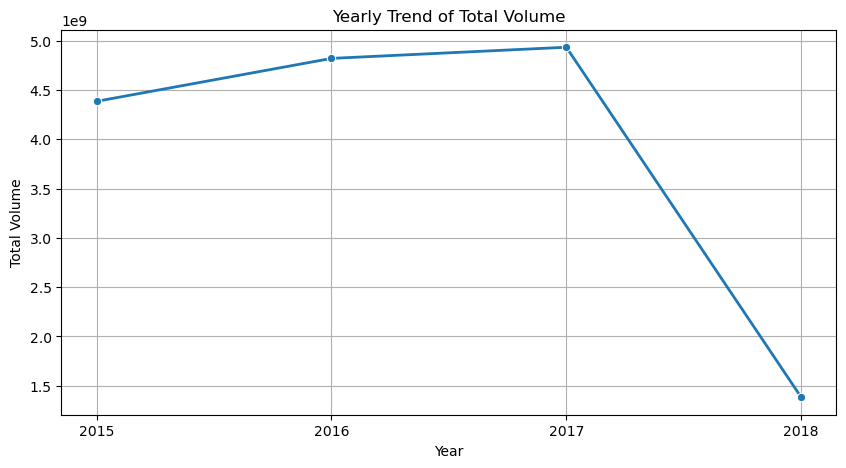

In [30]:
# Trend Analysis 
# Group data by year and sum the total volume
yearly_volume = df.groupby('year')['Total Volume'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 5))
sn.lineplot(data=yearly_volume, x='year', y='Total Volume', marker='o', linewidth=2)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.title("Yearly Trend of Total Volume")
plt.xticks(yearly_volume['year'])  # Ensure all years appear as whole numbers
plt.grid(True)

# Show the plot
plt.show()

### Encode Data

In [31]:
#Encode the Target column using LabelEncoder
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])

In [32]:
encoded_data = df  #Rename the new dataframe

In [33]:
encoded_data.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015


In [34]:
encoded_data.info()  #Double checking data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
dtypes: float64(9), int32(1), int64(1)
memory usage: 1.5 MB


### Train Model - KNRegression

In [35]:
#Define input and output data
X = encoded_data.iloc[:, 1:].values
y = encoded_data.iloc[:,0].values

In [36]:
#Split your dataset into 80% train, 10% test & 10 validation

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.20, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.50, random_state=42)

print(len(X_train), len(y_train), len(X_test), len(y_test), len(X_val), len(y_val))  #to doublecheck the output

14599 14599 1825 1825 1825 1825


In [37]:
#Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


# Check if the data was scaled! first data before and after scaling
X[0], X_train[0]

(array([6.423662e+04, 1.036740e+03, 5.445485e+04, 4.816000e+01,
        8.696870e+03, 8.603620e+03, 9.325000e+01, 0.000000e+00,
        0.000000e+00, 2.015000e+03]),
 array([1.01207886e-04, 8.28722825e-06, 4.25684233e-05, 0.00000000e+00,
        2.65806435e-04, 3.46968618e-04, 1.54247072e-06, 0.00000000e+00,
        1.00000000e+00, 6.66666667e-01]))

In [38]:
modelKNR = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
y_predKNR = modelKNR.predict(X_test)
scoreKNR = modelKNR.score(X_test, y_test)

print("mean absolute error: ", mean_absolute_error(y_test, y_predKNR))
print("mean square error:", mean_squared_error(y_test, y_predKNR))
print("R2:", r2_score(y_test, y_predKNR))

mean absolute error:  0.14194833659491196
mean square error: 0.04357742130276768
R2: 0.7497446667513485


##### Optimize KNRegression Model

In [39]:
#choose the best k
scores = []
nums = range(1,30)
best_k =[]
best_score_i =-1000
 
for i in nums:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_i = knn.score(X_test, y_test)
    scores.append(score_i)
    if score_i > best_score_i:
        best_score_i = score_i
        best_k = i
print("best score: ", best_score_i)
print("best k: ", best_k)

best score:  0.7605810632000938
best k:  3


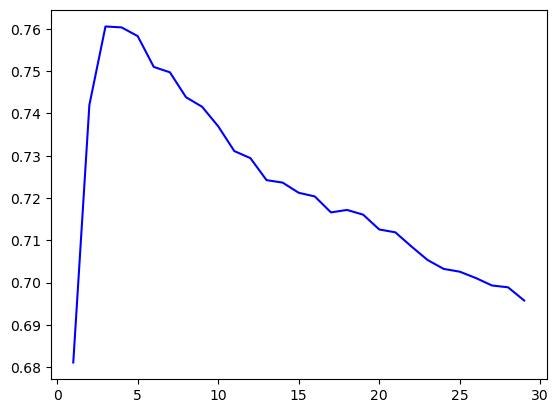

In [40]:
#Line Plot to show the best knn
plt.plot(nums, scores, color = 'blue')

In [41]:
print(scores)
knn_val = max(scores)
best_knn = scores.index(knn_val) + 1
print(knn_val,best_knn)

[0.6811104599926491, 0.7420052745854337, 0.7605810632000938, 0.7603643761428813, 0.7583017034625135, 0.7510103044369972, 0.7497446667513485, 0.7438485333300283, 0.7415920861363627, 0.7369704970545308, 0.7311115818095963, 0.7294389724074546, 0.7242402665412078, 0.7236526190001215, 0.7212440776854205, 0.7203787933124706, 0.7166078803641025, 0.7171869601843688, 0.7160758651799872, 0.7125698528369301, 0.7118916036387487, 0.7085440571868041, 0.7053544179528641, 0.7032458475965521, 0.7025839385736301, 0.7010835136547986, 0.6993231867715777, 0.6988861220023381, 0.6957700897850259]
0.7605810632000938 3


In [42]:
knn_best = KNeighborsRegressor(n_neighbors = best_knn)
knn_best.fit(X_train, y_train)
y_predtest = knn_best.predict(X_test)

print("mean absolute error: ", mean_absolute_error(y_test, y_predtest))
print("mean square error:", mean_squared_error(y_test, y_predtest))
print("R2:", r2_score(y_test, y_predtest))

mean absolute error:  0.1346557077625571
mean square error: 0.0416904596651446
R2: 0.7605810632000938


In [43]:
knn_best = KNeighborsRegressor(n_neighbors = best_knn)
knn_best.fit(X_train, y_train)
y_predval = knn_best.predict(X_val)


print("mean absolute error: ", mean_absolute_error(y_val, y_predval))
print("mean square error:", mean_squared_error(y_val, y_predval))
print("R2:", r2_score(y_val, y_predval))

mean absolute error:  0.1344785388127854
mean square error: 0.0409516407914764
R2: 0.7216686174731535


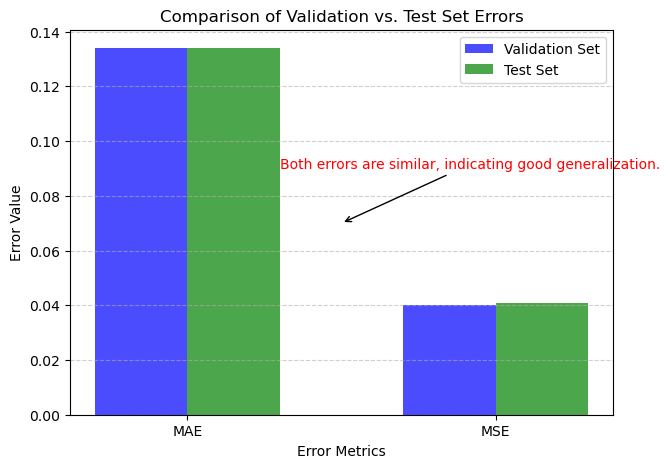

In [55]:
metrics = ["MAE", "MSE"]
validation_errors = [0.134, 0.040]  
test_errors = [0.134, 0.041]  
 
# Bar positions
x = np.arange(len(metrics))  # [0, 1] for MAE and MSE
width = 0.3  # Width of bars
 
# Plot
plt.figure(figsize=(7, 5))
plt.bar(x - width/2, validation_errors, width, label="Validation Set", color='blue', alpha=0.7)
plt.bar(x + width/2, test_errors, width, label="Test Set", color='green', alpha=0.7)
 
# Labels and Title
plt.xlabel("Error Metrics")
plt.ylabel("Error Value")
plt.title("Comparison of Validation vs. Test Set Errors")
plt.xticks(x, metrics)  # Assign "MAE" and "MSE" to x-axis
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.6)
 
#Annotation
note_text = "Both errors are similar, indicating good generalization."
plt.annotate(note_text, xy=(0.5, 0.07), xytext=(0.3, 0.09),
             fontsize=10, color="red", arrowprops=dict(facecolor='red', arrowstyle="->"))
plt.show()

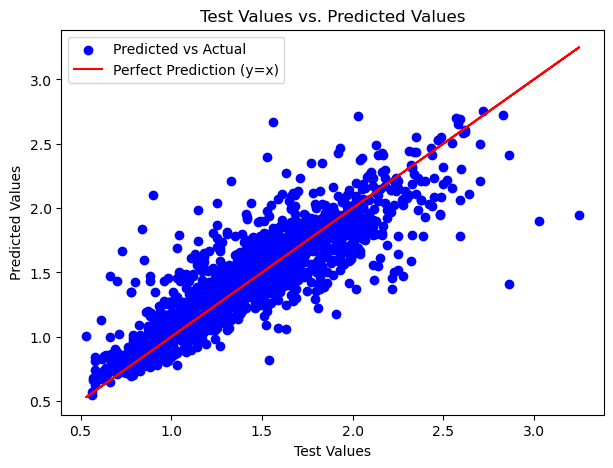

In [45]:
plt.figure(figsize=(7, 5)) #(width, height)
plt.scatter(y_test, y_predtest, color='blue', label="Predicted vs Actual")  
plt.plot(y_test, y_test, color='red', label="Perfect Prediction (y=x)")  # perfect prediction line
 
plt.xlabel("Test Values")  
plt.ylabel("Predicted Values")
plt.title("Test Values vs. Predicted Values")
plt.legend()
plt.show()

In [46]:
print("R2:", r2_score(y_test, y_predtest))
print("R2:", r2_score(y_val, y_predval))

R2: 0.7605810632000938
R2: 0.7216686174731535


#### 0.70 - 0.89 Good model (captures most variance)

## Using Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train, y_train)
y_predLR = LR.predict(X_test)
scoreLR = LR.score(X_test, y_test)

print("mean absolute error: ", mean_absolute_error(y_test, y_predLR))
print("mean square error:", mean_squared_error(y_test, y_predLR))
print("R2:", r2_score(y_test, y_predLR))

mean absolute error:  0.2508310797459753
mean square error: 0.10592839464685685
R2: 0.3916770448929664


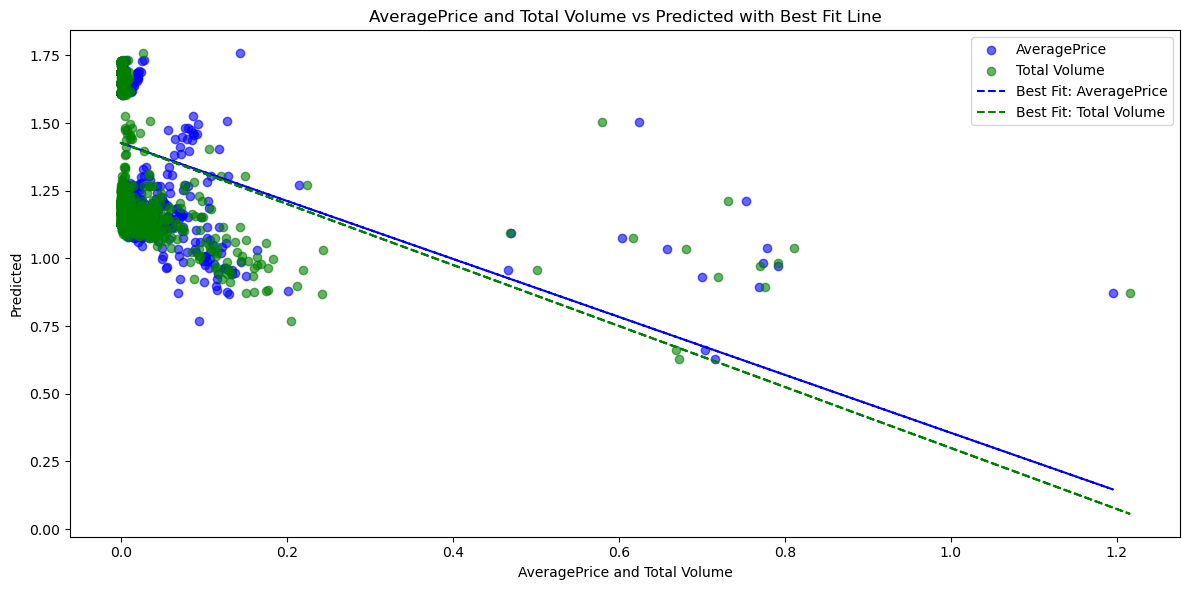

In [49]:
# Combine predicted values (y_predLR) with corresponding 'AveragePrice' and 'Total Volume'
X_test_df = pd.DataFrame(X_test, columns=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
                                          'XLarge Bags', 'year'])  # Ensure this matches your actual columns
results_df = X_test_df[['AveragePrice', 'Total Volume']].copy()
results_df['Predicted'] = y_predLR

# Scatter plot for both 'AveragePrice' vs Predicted and 'Total Volume' vs Predicted on the same graph
plt.figure(figsize=(12, 6))

# Scatter plot for AveragePrice vs Predicted
plt.scatter(results_df['AveragePrice'], results_df['Predicted'], color='blue', alpha=0.6, label='AveragePrice')

# Scatter plot for Total Volume vs Predicted
plt.scatter(results_df['Total Volume'], results_df['Predicted'], color='green', alpha=0.6, label='Total Volume')

# Fit a line for 'AveragePrice' vs Predicted
lr_avg_price = LinearRegression().fit(results_df[['AveragePrice']], results_df['Predicted'])
y_fit_avg_price = lr_avg_price.predict(results_df[['AveragePrice']])
plt.plot(results_df['AveragePrice'], y_fit_avg_price, color='blue', linestyle='--', label='Best Fit: AveragePrice')

# Fit a line for 'Total Volume' vs Predicted
lr_total_volume = LinearRegression().fit(results_df[['Total Volume']], results_df['Predicted'])
y_fit_total_volume = lr_total_volume.predict(results_df[['Total Volume']])
plt.plot(results_df['Total Volume'], y_fit_total_volume, color='green', linestyle='--', label='Best Fit: Total Volume')

# Add details
plt.title('AveragePrice and Total Volume vs Predicted with Best Fit Line')
plt.xlabel('AveragePrice and Total Volume')
plt.ylabel('Predicted')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### KNN Regression model with K=3 performed better, high R2, with lower mae and mse of 0.76, 0.134 and 0.042 respectively.


In [59]:
from sklearn.preprocessing import PolynomialFeatures
scoresPR = []
for i in range(1,6):
    poly=PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X)    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scoresPR.append(score)
    scorePR = max(scoresPR)

    
bestPoly = scoresPR.index(max(scoresPR)) + 1 # location of max score

print('Max polynomial score is: ',scorePR, "with a value of",bestPoly)

Max polynomial score is:  0.3916770448929664 with a value of 1


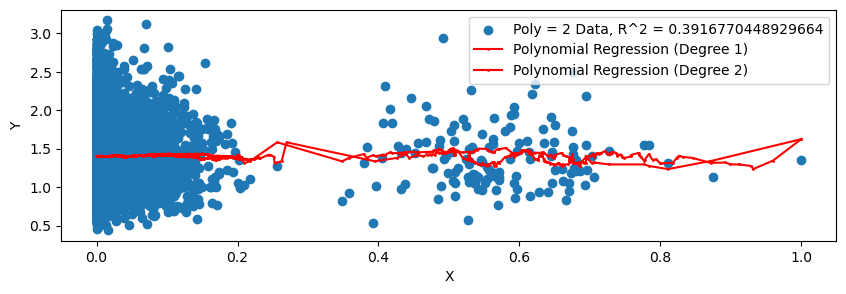

In [69]:
degree = 2
poly=PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(X)
    
model = LinearRegression()
model.fit(X_train, y_train)

#Generate predictions to plot
X_train = np.sort(X_train, axis = 0)
y_plot = model.predict(X_train)


# Plot the original data points
plt.figure(figsize=(10, 3))
#plt.scatter(X, y, label= f'Original Data, R^2 = {scorePR}')
plt.scatter(X_train[:,degree], y_train, label=f'Poly = {degree} Data, R^2 = {scoresPR[degree]}')

# Plot the curve of best fit
plt.plot(X_train[:,degree-1], y_plot, color='red', marker = '.', markersize = 2,label=f'Polynomial Regression (Degree {degree-1})')
plt.plot(X_train[:,degree], y_plot, color='red', marker = '.', markersize = 2, label=f'Polynomial Regression (Degree {degree})')
# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()